In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X, y =make_blobs(n_samples=100, centers=4, n_features=2, random_state=6)
points = pd.DataFrame(X, y).reset_index(drop=True)

In [3]:
points

,0,1
0,0.276181,-2.217047
1,7.927368,-9.761527
2,8.491428,-2.549749
3,-11.537102,2.434883
4,4.292259,-8.992204
...,...,...
95,0.874864,-2.051392
96,1.084631,-0.553542
97,7.968331,-3.231253
98,1.288840,-0.662518


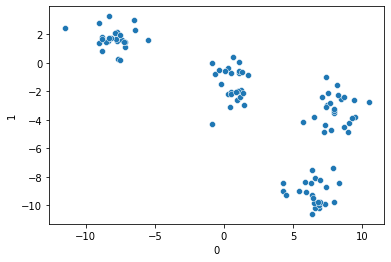

In [11]:
sns.scatterplot(x = 0, y= 1, data=points, palette='Set2')
plt.show()

In [13]:
centroids = points.sample(4, random_state=1)
centroids

,0,1
80,-8.842286,1.786914
84,4.510561,-9.305970
33,5.883975,-8.372845
81,-8.831594,1.690414


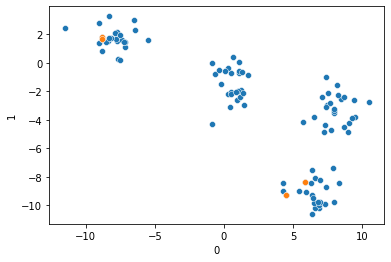

In [17]:
sns.scatterplot(x = 0, y= 1, data=points, palette='Set2')
sns.scatterplot(x = 0, y= 1, data=centroids, palette='Set1')
plt.show()

In [18]:
distance = sp.spatial.distance.cdist(points, centroids, 'euclidean')
cluster_num = np.argmin(distance, axis=1)
result = points.copy()
result['cluster'] = np.array(cluster_num)
result.head()

,0,1,cluster
0,0.276181,-2.217047,1
1,7.927368,-9.761527,2
2,8.491428,-2.549749,2
3,-11.537102,2.434883,0
4,4.292259,-8.992204,1


In [29]:
distance[:5]

array([[ 9.95882274,  8.25728768,  8.32713673,  9.91059163],
       [20.36142922,  3.44704228,  2.47060542, 20.29802411],
       [17.86796877,  7.84179976,  6.38022419, 17.83440774],
       [ 2.77162333, 19.88404187, 20.50124203,  2.80606584],
       [16.99134122,  0.3822363 ,  1.70797157, 16.9219937 ]])

In [25]:
# 각 행별로 가장 작은 값의 인덱스 보여줌
# 이 때 centroid가 총 4개 이므로 
np.argmin(distance, axis=1)

array([1, 2, 2, 0, 1, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 3, 2, 2, 3, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 0, 0,
       3, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 3, 2,
       3, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 3, 2, 3, 0, 3, 2, 2, 1, 3, 0, 2,
       3, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2], dtype=int64)

# 첫번째 작업

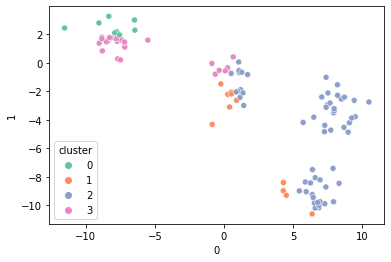

In [21]:
sns.scatterplot(x = 0, y= 1, hue = 'cluster', data=result, palette='Set2')
plt.show()

In [31]:
centroids_2 = result.groupby('cluster').mean()
centroids_2

,0,1
cluster,,
0,-8.211603,2.420481
1,1.913263,-5.034035
2,6.180105,-5.007395
3,-5.728498,0.878158


In [33]:
distance = sp.spatial.distance.cdist(points, centroids_2, 'euclidean')
cluster_num = np.argmin(distance, axis=1)
result = points.copy()
result['cluster'] = np.array(cluster_num)
result.head()

,0,1,cluster
0,0.276181,-2.217047,1
1,7.927368,-9.761527,2
2,8.491428,-2.549749,2
3,-11.537102,2.434883,0
4,4.292259,-8.992204,2


# 두 번째 작업

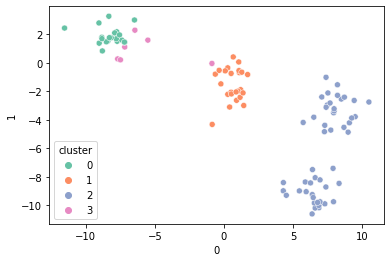

In [34]:
sns.scatterplot(x = 0, y= 1, hue = 'cluster', data=result, palette='Set2')
plt.show()

# 세번째 작업

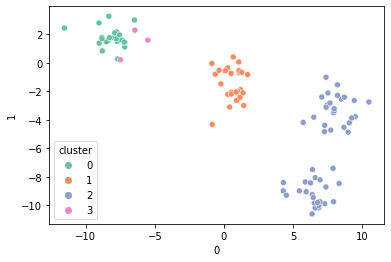

In [35]:
centroids_3 = result.groupby('cluster').mean()

distance = sp.spatial.distance.cdist(points, centroids_3, 'euclidean')
cluster_num = np.argmin(distance, axis=1)
result = points.copy()
result['cluster'] = np.array(cluster_num)

sns.scatterplot(x = 0, y= 1, hue = 'cluster', data=result, palette='Set2')
plt.show()

# 4번째 작업

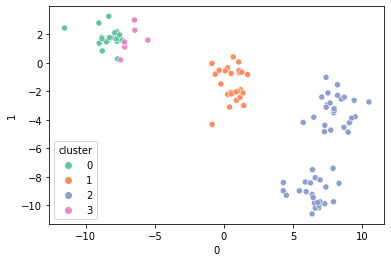

In [36]:
centroids_4 = result.groupby('cluster').mean()

distance = sp.spatial.distance.cdist(points, centroids_4, 'euclidean')
cluster_num = np.argmin(distance, axis=1)
result = points.copy()
result['cluster'] = np.array(cluster_num)

sns.scatterplot(x = 0, y= 1, hue = 'cluster', data=result, palette='Set2')
plt.show()

# sklearn Kmeans

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

KMeans(n_clusters=4)

In [43]:
result_by_sklearn = points.copy()
result_by_sklearn['cluster'] = kmeans.labels_
result_by_sklearn

,0,1,cluster
0,0.276181,-2.217047,0
1,7.927368,-9.761527,1
2,8.491428,-2.549749,2
3,-11.537102,2.434883,3
4,4.292259,-8.992204,1
...,...,...,...
95,0.874864,-2.051392,0
96,1.084631,-0.553542,0
97,7.968331,-3.231253,2
98,1.288840,-0.662518,0


<AxesSubplot:xlabel='0', ylabel='1'>

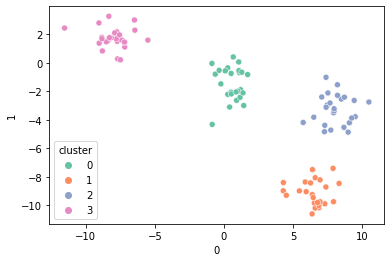

In [47]:
sns.scatterplot(x=0, y =1, hue='cluster', data=result_by_sklearn, palette = 'Set2')